In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
fraud = pd.read_csv('/content/Fraud_check.csv')

In [ ]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
# creating dummy variables
fraud=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [ ]:
fraud

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [ ]:
# creating taxable income <= 30000 & labelling them as as "Risky" and others are "Good"
fraud['TaxInc']=pd.cut(fraud['Taxable.Income'], bins = [0,30000,99620], labels=['Risky','Good'])

In [ ]:
pd.get_dummies(fraud,columns=['TaxInc'], drop_first=True)


,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


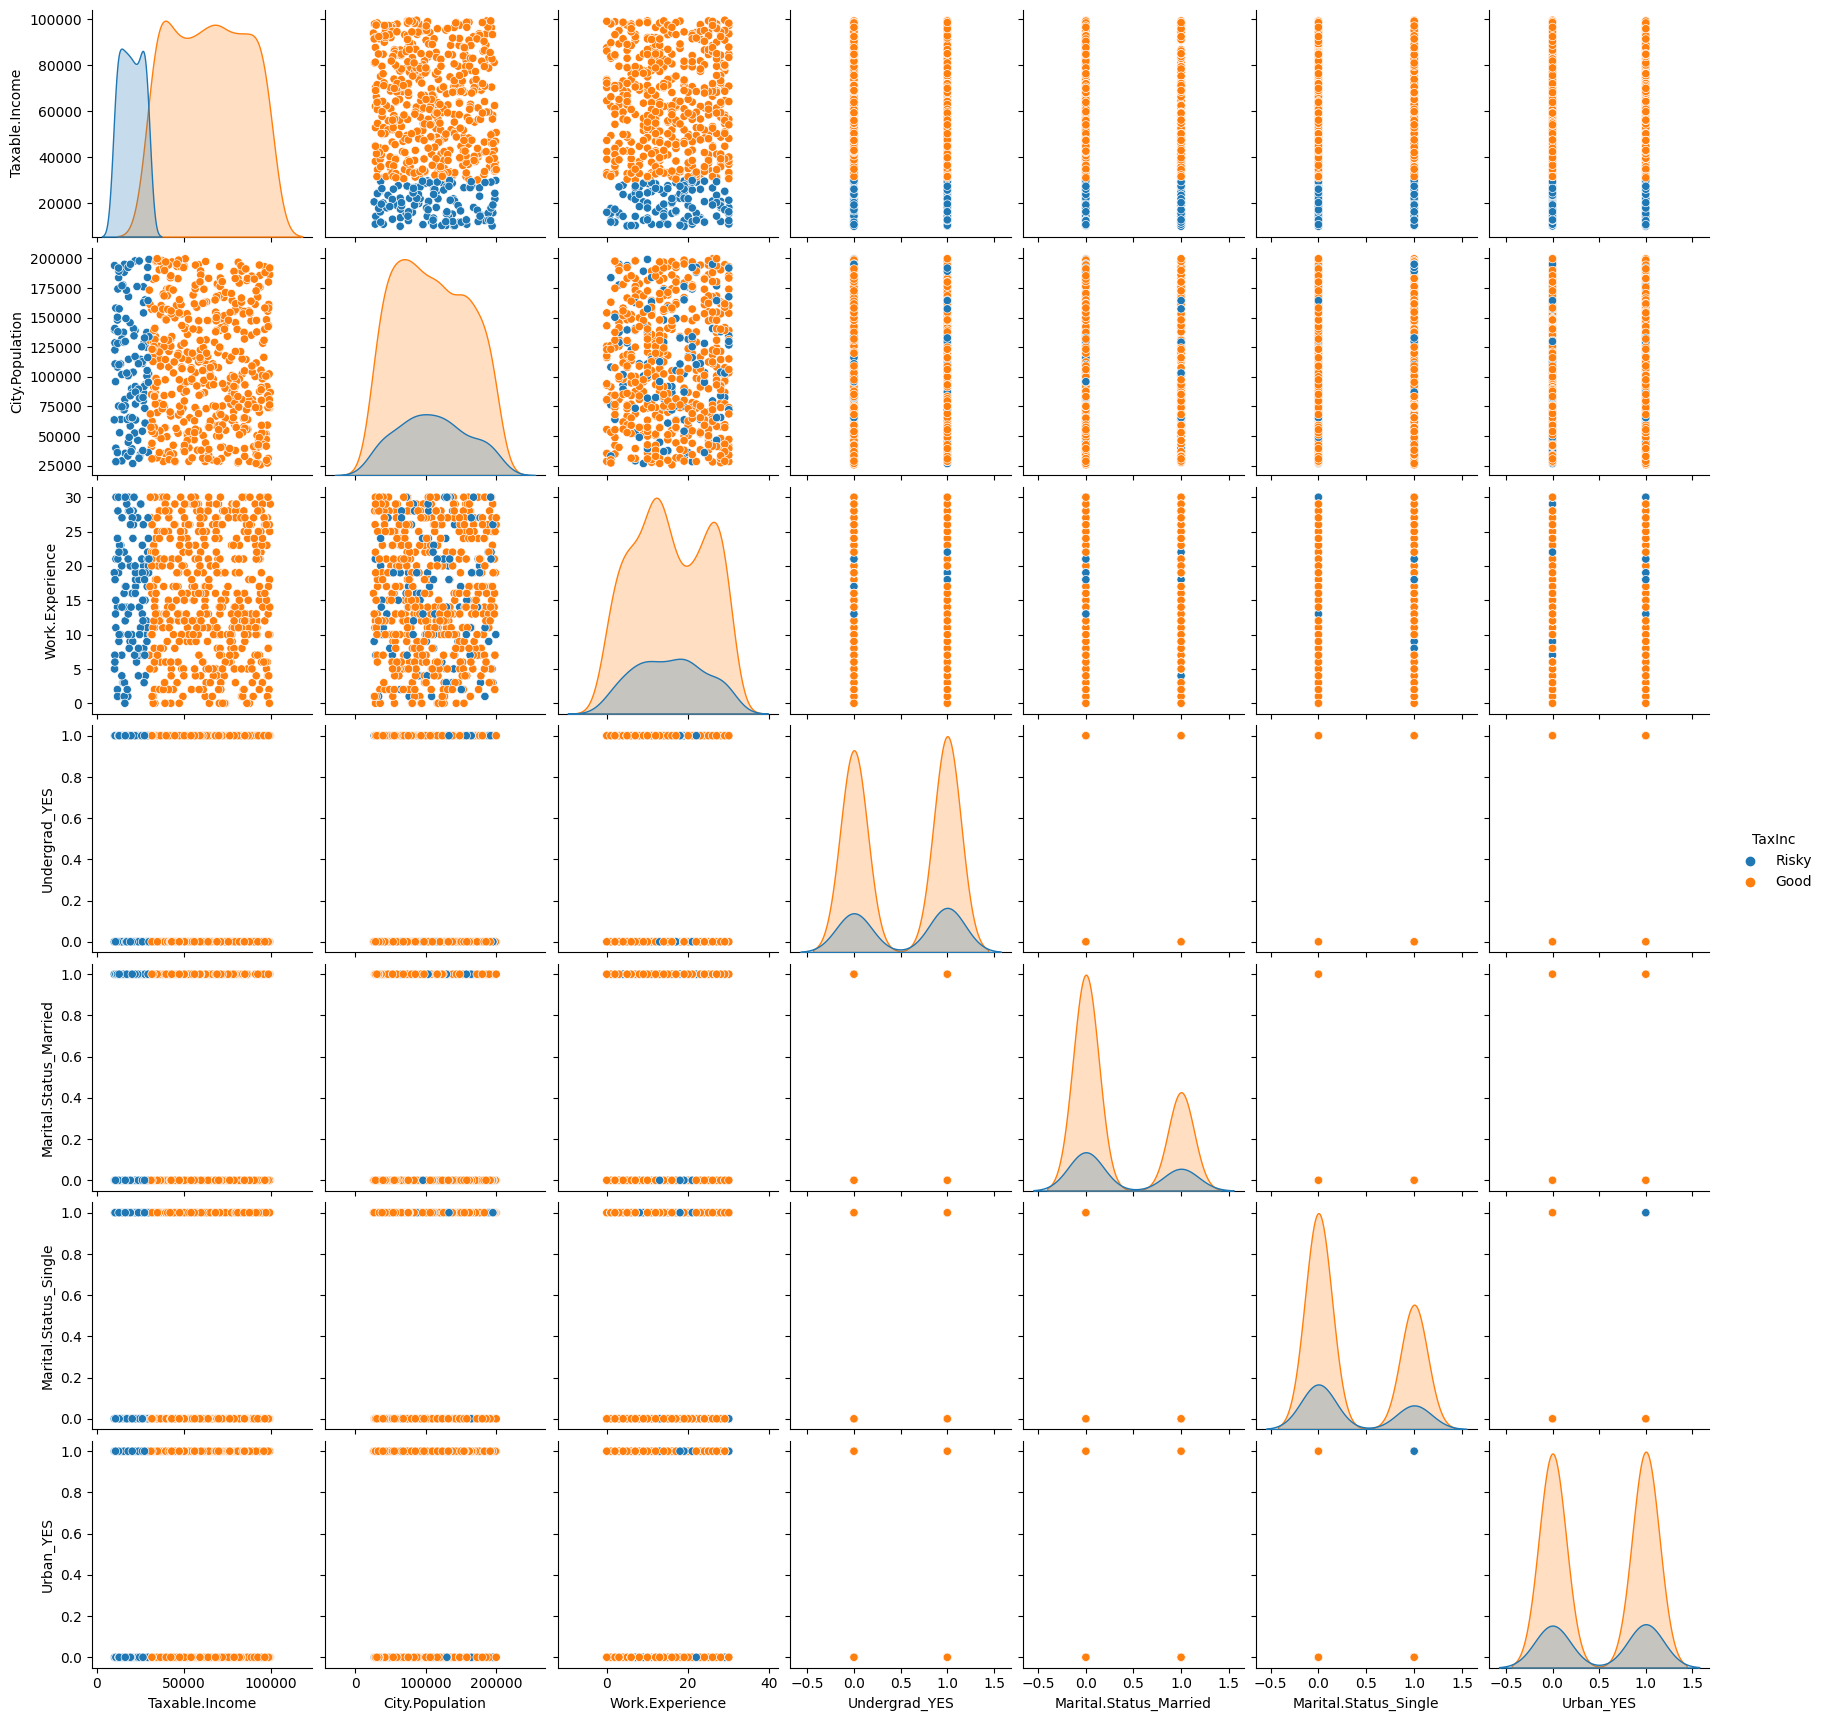

In [ ]:
sns.pairplot(data=fraud,hue='TaxInc')

In [ ]:

x=fraud.iloc[:,1:7]
x

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
595,39492,7,1,0,0,1
596,55369,2,1,0,0,1
597,154058,0,0,0,0,1
598,180083,17,1,1,0,0


In [ ]:
y=fraud.iloc[:,-1]
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxInc, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=0)

In [ ]:
model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=40, criterion='gini')

In [ ]:
model.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=20, min_samples_split=40, n_estimators=200)

In [ ]:
print('Train Accuracy:{}'.format(model.score(xtrain,ytrain)))

Train Accuracy:0.8071428571428572


In [ ]:
print('Test Accuracy:{}'.format(model.score(xtest,ytest)))

Test Accuracy:0.7611111111111111
